In [1]:
# I was having trouble understanding the EMD to do Card Abstraction, so I was making this notebook to better understand

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import time

In [58]:
# The distance to move is independent of what the actual values are. Think about it this way: it's how much you need to walk to move something, not how much weight you are actually carrying.
n = 5  # number of bins
pos_a = np.array([[i] for i in range(n)])
pos_b = np.array([[i] for i in range(n)])

C = ot.dist(pos_a, pos_b, metric='euclidean')
def plot_cost(C):
	plt.figure(figsize=(12,7))
	ax = plt.subplot(131)
	im = plt.imshow(C, cmap='coolwarm')
	plt.title('Cost Matrix')
	cbar = plt.colorbar(im, ax=ax, shrink=0.5, use_gridspec=True)
	cbar.ax.set_ylabel("cost", rotation=-90, va="bottom")

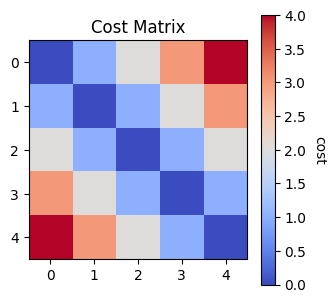

In [59]:
plot_cost(C)

Cost: 4.0


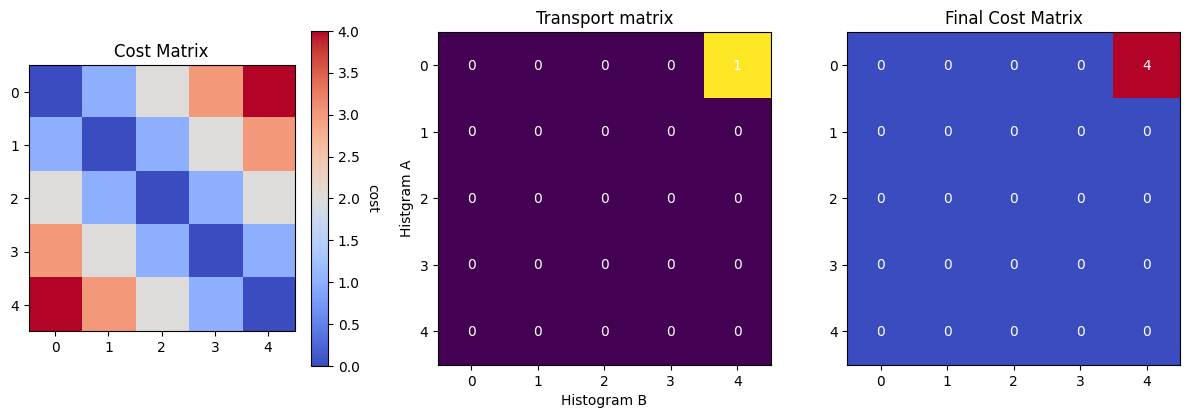

In [61]:
plot_cost(C)
# 1 vs 1. Sample
a_hist = np.array([1.0,0,0,0,0])
b_hist = np.array([0,0,0,0,1.0])
ot_emd = ot.emd(a_hist, b_hist, C)
ax = plt.subplot(132)
im = plt.imshow(ot_emd)
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(ot_emd[i, j]),
                       ha="center", va="center", color="w")
plt.title('Transport matrix')
plt.xlabel('Histogram B')
plt.ylabel('Histgram A')
plt.tight_layout()
# The cost would be how much you are transporting for each, multipled by the original cost matrix

ax =plt.subplot(133)
transport_cost_matrix = ot_emd * C
plt.imshow(transport_cost_matrix, cmap='coolwarm')
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(transport_cost_matrix[i, j]),
                       ha="center", va="center", color="w")

plt.title('Final Cost Matrix')
print(f'Cost: {transport_cost_matrix.sum()}')

In [8]:
def plot_equity_hist(equity_hist, player_cards=None, community_cards=None):
	"""Plot the equity histogram.
	"""
	plt.clf() # Clear Canvas
	plt.hist([i/len(equity_hist) for i in range(len(equity_hist))],[i/len(equity_hist) for i in range(len(equity_hist)+1)], weights=equity_hist)
	plt.ylabel("Probability Mass")
	plt.xlabel("Equity Interval")
	if player_cards:
		player_string = "\nPlayer Cards: " + str(player_cards)
	else:
		player_string = ""
	
	if community_cards:
		community_string = "\nCommunity Cards: " + str(community_cards)
	else:
		community_string = ""

	plt.title("Equity Distribution" + player_string + community_string)
	plt.show(block=False) # to plot graphs consecutively quickly with non-blocking behavior
	plt.pause(0.2)

In [1]:

import sys
import joblib
import os
sys.path.append("../")
from abstraction import get_filenames, kmeans, kmeans_predict

In [5]:

stage = "turn"
raw_dataset_filenames = get_filenames(f'../data/raw/{stage}')
sorted(raw_dataset_filenames)
filename = raw_dataset_filenames[-1] # Take the most recently generated dataset to run our clustering on

equity_distributions = np.load(f'../data/raw/{stage}/{filename}')
if not os.path.exists(f'../data/clusters/{stage}/{filename}'):
	print(f"Generating the cluster for the {stage}")
	cluster_indices, centroids = kmeans(equity_distributions, n_clusters=10) # Perform Clustering
	joblib.dump(centroids, f'../data/clusters/{stage}/{filename}')
else: # Centroids have already been generated, just load them, which are tensors
	centroids = joblib.load(f'../data/clusters/{stage}/{filename}')


sorted_centroids = centroids[centroids[:, 0].argsort()]
cluster_indices = kmeans_predict(equity_distributions,  centroids)
print(sorted_centroids)


predicting on cpu..
tensor([[0.0000e+00, 3.1250e-04, 1.4875e-01, 6.8281e-01, 1.6813e-01],
        [0.0000e+00, 3.5714e-04, 3.5714e-02, 2.8214e-01, 6.8179e-01],
        [0.0000e+00, 2.7273e-03, 5.7727e-02, 5.0318e-01, 4.3636e-01],
        [0.0000e+00, 1.7857e-03, 5.3571e-03, 3.5714e-02, 9.5714e-01],
        [3.6111e-03, 2.1111e-02, 4.5583e-01, 4.1972e-01, 9.9722e-02],
        [5.7692e-03, 1.1673e-01, 6.0423e-01, 2.0058e-01, 7.2692e-02],
        [1.2609e-02, 3.9043e-01, 3.9087e-01, 7.5435e-02, 1.3065e-01],
        [7.9318e-02, 6.3841e-01, 1.6886e-01, 5.8182e-02, 5.5227e-02],
        [4.6611e-01, 2.9593e-01, 5.3333e-02, 8.8519e-02, 9.6111e-02],
        [7.7328e-01, 9.5345e-02, 6.3103e-02, 4.2414e-02, 2.5862e-02]])


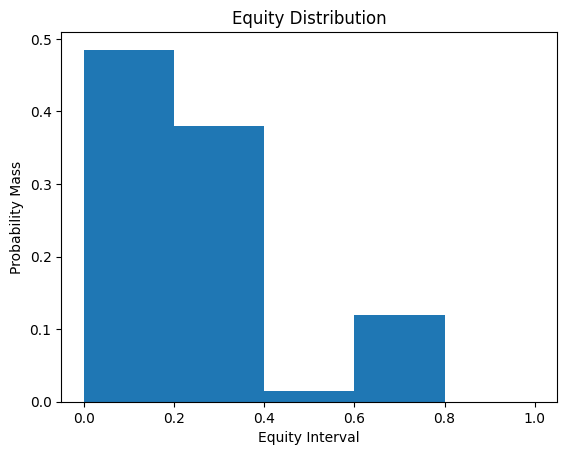

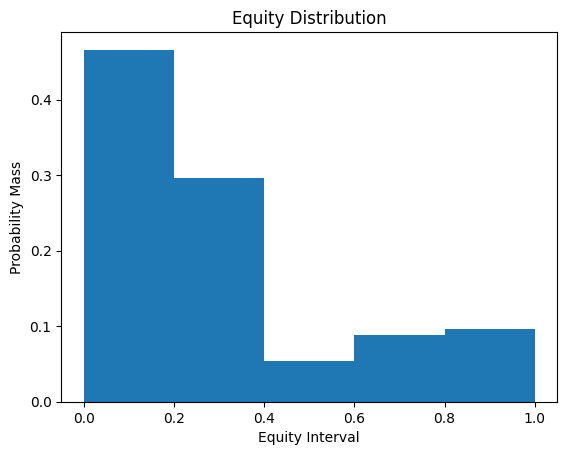

In [13]:
# visually inspect similarity
plot_equity_hist(equity_distributions[-1])
plot_equity_hist(centroids[7])